# K-means Clustering

- K-means is an unsupervised machine learning algorithm for clustering data points.
- It partitions data into K clusters based on similarity, where each cluster has a centroid.
- The algorithm iteratively assigns data points to the nearest cluster centroid and updates the centroids until convergence.
- Choosing the optimal number of clusters (K) is a critical step, often determined using the elbow method or silhouette score.
- K-means is widely used in customer segmentation, image compression, and various data analysis tasks.

In [1]:
# Imporiting required libraries
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# For iris dataset
from sklearn.datasets import load_iris

In [2]:
# Loading csv file
df = pd.read_csv("Mall_Customers.csv")
# PEinting Dataset
print("Dataframe is:\n")
print(df)

Dataframe is:

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [44]:
# Printing first 5 rows of datset
print("First 5 rows of dataset are:\n")
print(df.head())

First 5 rows of dataset are:

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [45]:
# Columns of dataframe
print("Columns of dataframe are:\n")
print(df.columns)

Columns of dataframe are:

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
# Defining the number of clusters (we should choose an appropriate value)
# Here we define the number of cluster that our algorithm should create in the dataset
num_clusters = 2

# Creating a KMeans instance with the specified number of clusters
# Importing the algorithm
kmeans = KMeans(n_clusters=num_clusters)

In [3]:
# Since the dataset contains a string value column we need to drop it
# Also customer id is of no use currently so we can remove it as well
df = df.drop(columns = {'Gender'}, axis =1)

In the context of K-means clustering, "cluster labels" and "cluster centers" are important concepts:

1. **Cluster Labels:**
   - Cluster labels refer to the assignments of data points to specific clusters after running the K-means algorithm. Each data point in the dataset is assigned to one of the K clusters.
   - Each data point is assigned to the cluster whose centroid (center) is closest to that data point. The assigned cluster label is an integer value that indicates which cluster the data point belongs to.
   - For example, if you have performed K-means clustering with K=3 clusters, the cluster labels might look like [0, 1, 0, 2, 1, ...], where each number corresponds to the cluster assignment for a data point.
 
 <br>

2. **Cluster Centers:**
   - Cluster centers, often referred to as centroids, are the representative points or central points of each cluster.
   - These centroids are calculated as the mean (average) of all data points in a cluster along each dimension (feature).
   - For example, if you have two features (Feature1 and Feature2) and you're clustering data into 3 clusters, you'll have three centroids, each with values for Feature1 and Feature2.
   - These centroids are the "centers" around which the data points in their respective clusters tend to cluster.

In summary, cluster labels indicate which cluster each data point belongs to, while cluster centers (centroids) represent the central points of each cluster. K-means clustering assigns data points to clusters based on their proximity to these cluster centers, and the algorithm iteratively updates the centroids to minimize the distance between data points and their assigned centroids.

In [5]:
# Fit the KMeans model to data
# Training data
kmeans.fit(df)

# Getting the cluster labels and cluster centers
# Labels refers to the label in which the data point is clustered or in other words it occurs
labels = kmeans.labels_
centers = kmeans.cluster_centers_

C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# Creating a new data point to check algorithm
new_data_point = [[3,20,15,32]]

# Predicting the cluster label for the new data point
cluster_label = kmeans.predict(new_data_point)

# Interpret the cluster label based on your analysis
print(f"The new data point belongs to Cluster {cluster_label[0]}")

The new data point belongs to Cluster 0


C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Data Visualization of Dataset

Text(0, 0.5, 'Values')

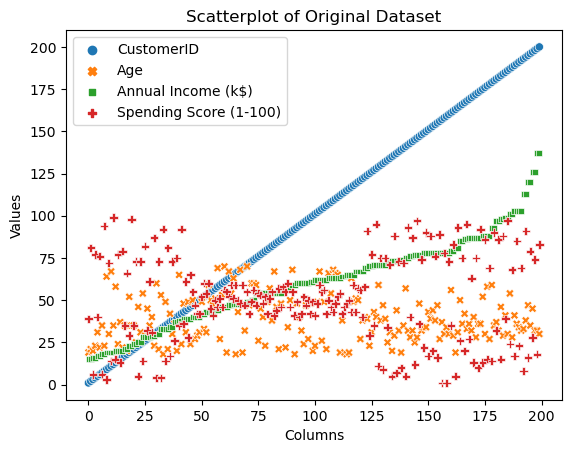

In [54]:
# Plotting using seaborn
sns.scatterplot(df)
plt.title("Scatterplot of Original Dataset")
plt.xlabel("Columns")
plt.ylabel("Values")

Text(0, 0.5, 'Values')

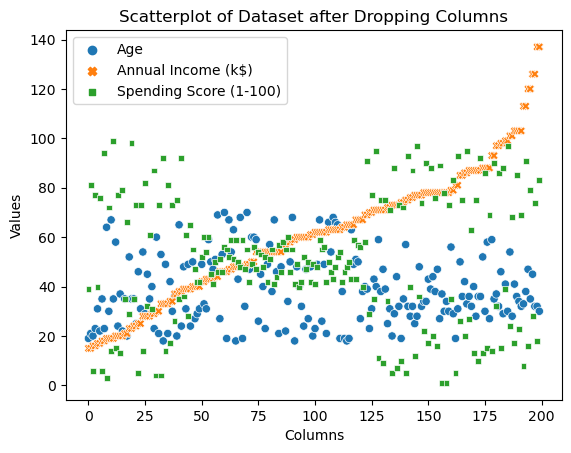

In [65]:
# Plotting using seaborn
sns.scatterplot(df)
plt.title("Scatterplot of Dataset after Dropping Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

Text(0, 0.5, 'Spending Score (1-100)')

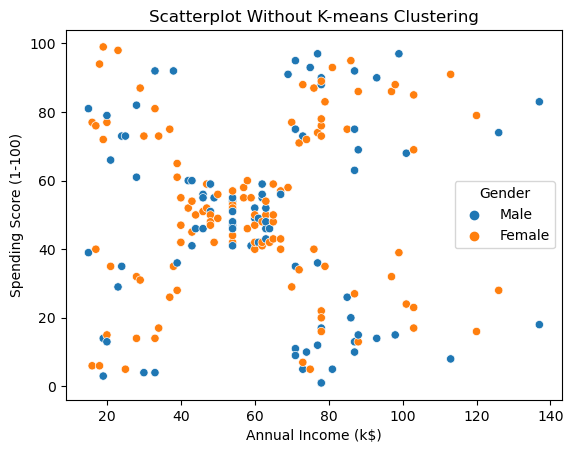

In [58]:
# Plotting using seaborn
sns.scatterplot(x='Annual Income (k$)', y = "Spending Score (1-100)", data = df, hue = 'Gender')

# Add labels and legend
plt.title('Scatterplot Without K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Data Visualization of Dataset After Clustering

Text(0, 0.5, 'Spending Score (1-100)')

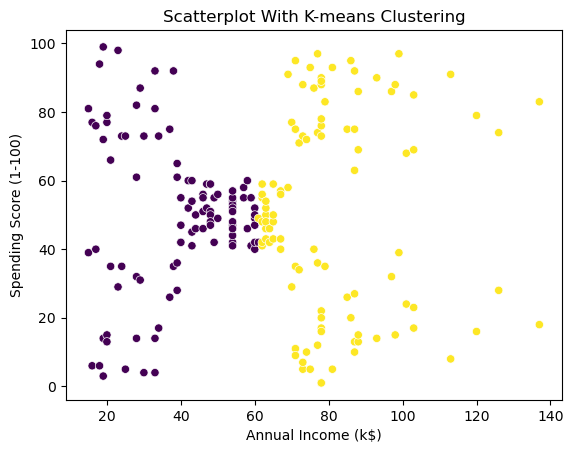

In [8]:
# Plotting using seaborn
sns.scatterplot(x='Annual Income (k$)', y = "Spending Score (1-100)", data = df, c = labels)

# Add labels and legend
plt.title('Scatterplot With K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

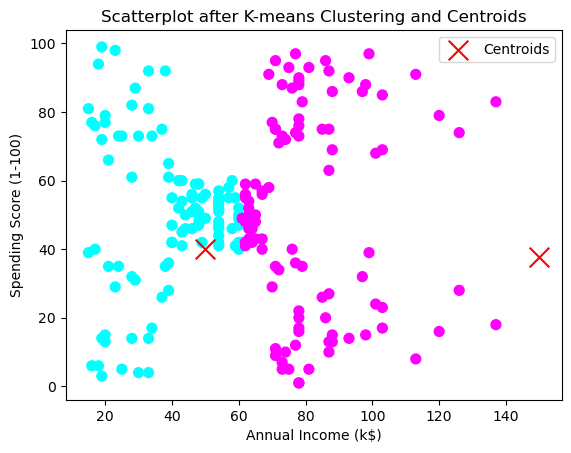

In [9]:
# Create a scatter plot of data points colored by their cluster labels
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='cool', s=50)
# Plot cluster centers as red 'X' marks
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and legend
plt.title('Scatterplot after K-means Clustering and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Trying on another dataset Iris
## Iris is a classification data meaning it has assigned categories
## We can apply knn algorithm to check how accurate clusters it is making for this dataset

In [2]:
# Loading the dataset
data = load_iris()
# Printing dataset
print("Dataframe is:\n")
print(data)

Dataframe is:

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1

In [5]:
# Now we will drop the class and only access the data part of iris
# Features (sepal length, sepal width, petal length, petal width)
df = data.data
print("Dataframe is:\n")
print(df)

Dataframe is:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.

In [4]:
# The target values are stored in target variable, by accessing only the data part we do not access the target part
print("The target variable is:\n")
print(data.target)

The target variable is:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# This is an optional step we can remove this as well
# This is done so that all features has equal importance in the algorithm
```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
```

In [7]:
# Since we have already imported the algorithm we can directly use it
# Defining the number of clusters (we should choose an appropriate value)
# Here we define the number of cluster that our algorithm should create in the dataset
# Since we already knew that 3 classes exists in the dataset, we are setting this to 3
num_clusters = 3

# Creating a KMeans instance with the specified number of clusters
# Importing the algorithm
kmeans = KMeans(n_clusters=num_clusters)

In [9]:
# Fit the KMeans model to data
# Training data
kmeans.fit(df)

# Getting the cluster labels and cluster centers
# Labels refers to the label in which the data point is clustered or in other words it occurs
labels = kmeans.labels_
centers = kmeans.cluster_centers_

C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Creating a new data point to check algorithm
new_data_point = df[0,]

# Converting to 2D array
new_data_point = new_data_point.reshape(1, -1)

# Predicting the cluster label for the new data point
cluster_label = kmeans.predict(new_data_point)

# Interpret the cluster label based on your analysis
print(f"The new data point belongs to Cluster {cluster_label[0]}")

# Now we can cross verify to see which class this first row of iris dataset belongs to in reality
print("Data point class in iris dataset:",data.target[0])

# Thus we can see it is correctly predicting the clusters
# In other words data points are clustered correctly

The new data point belongs to Cluster 1
Data point class in iris dataset: 0


# Data Visualization of Dataset

In [17]:
# Before visualization we will first convert dataset to dataframe with specific column names
# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(df, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# Also adding target variable
df['target'] = data.target
print("Dataframe is:\n")
print(df)

Dataframe is:

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


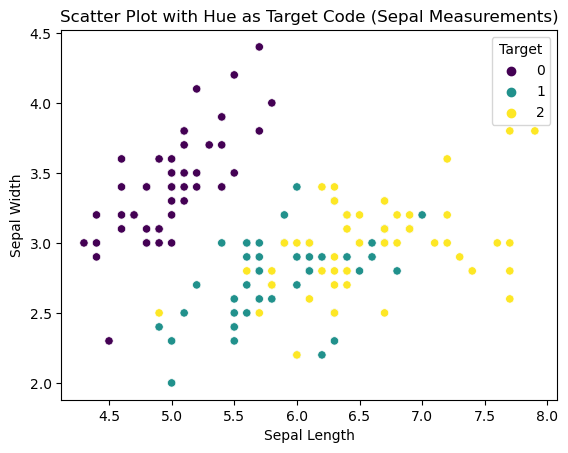

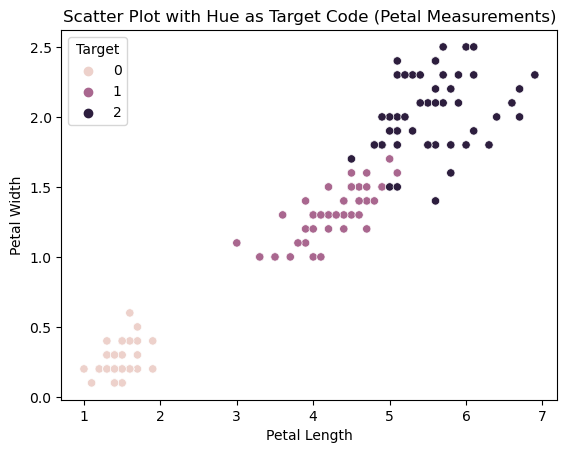

In [39]:
# Create a scatter plot with hue as the target code for sepal measurements
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='target', palette='viridis')

# Add labels and a legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot with Hue as Target Code (Sepal Measurements)')
plt.legend(title='Target')

# Show the first plot
plt.show()

# Create a scatter plot for petal measurements without specifying hue
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='target')

# Add labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot with Hue as Target Code (Petal Measurements)')
plt.legend(title='Target')

# Show the second plot
plt.show()


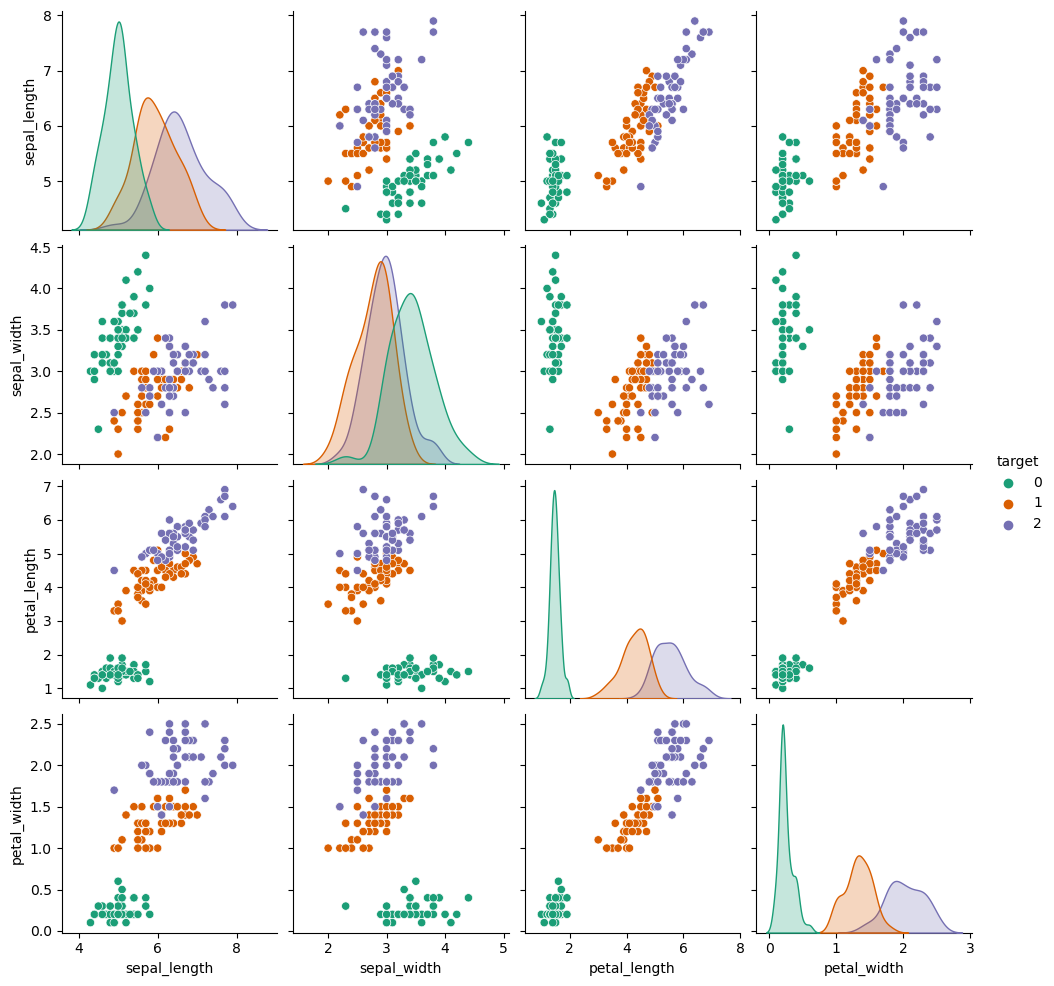

In [23]:
# Plotting using seaborn
sns.pairplot(df, hue = 'target', palette='Dark2')

# Data Visualization of Dataset After Clustering

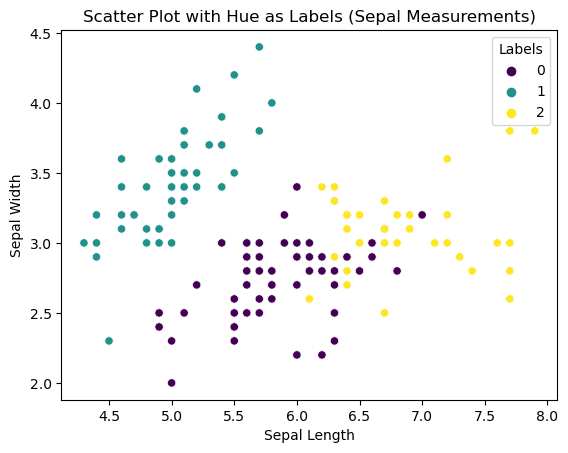

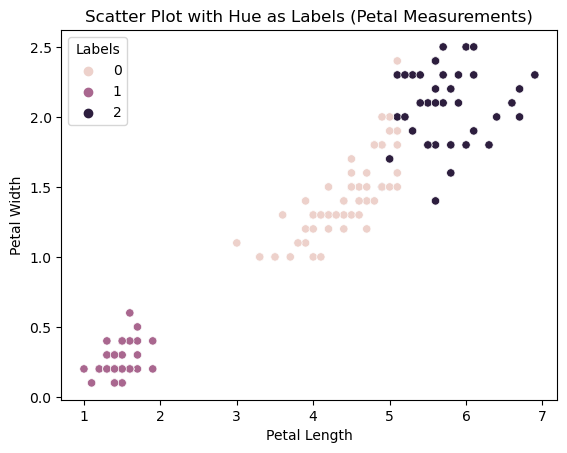

In [42]:
# Create a scatter plot with hue as the target code for sepal measurements
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue=labels, palette='viridis')

# Add labels and a legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot with Hue as Labels (Sepal Measurements)')
plt.legend(title='Labels')

# Show the first plot
plt.show()

# Create a scatter plot for petal measurements without specifying hue
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue=labels)

# Add labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot with Hue as Labels (Petal Measurements)')
plt.legend(title='Labels')

# Show the second plot
plt.show()

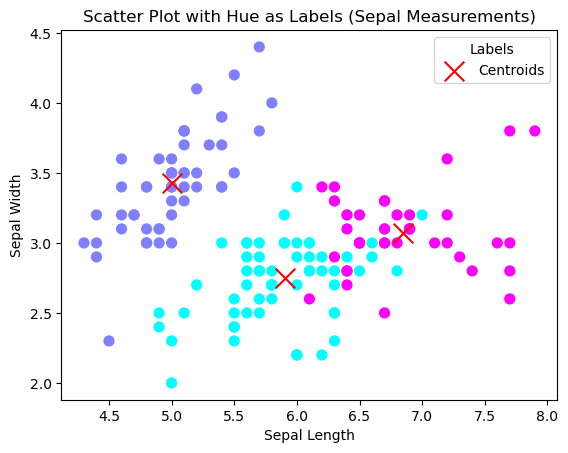

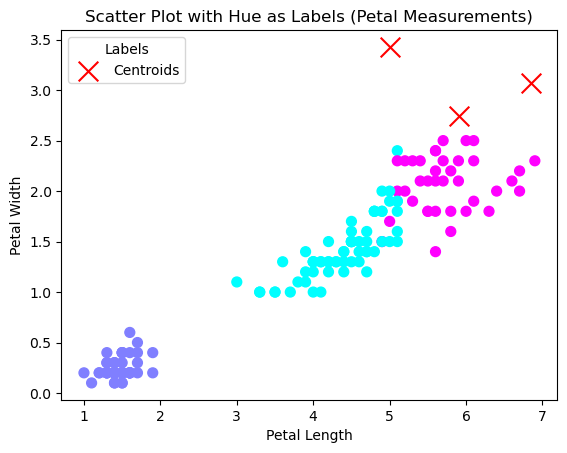

In [44]:
# Create a scatter plot of data points colored by their cluster labels
plt.scatter(df['sepal_length'], df['sepal_width'], c=labels, cmap= 'cool', s=50)
# Plot cluster centers as red 'X' marks
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')


# Add labels and a legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot with Hue as Labels (Sepal Measurements)')
plt.legend(title='Labels')

# Show the first plot
plt.show()

# Create a scatter plot of data points colored by their cluster labels
plt.scatter(df['petal_length'], df['petal_width'], c=labels, cmap= 'cool', s=50)
# Plot cluster centers as red 'X' marks
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')


# Add labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot with Hue as Labels (Petal Measurements)')
plt.legend(title='Labels')

# Show the second plot
plt.show()